In [15]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [16]:
dataframe_treino = pd.read_csv('train_reduzido_1_5.csv', sep=';')
dataframe_teste = pd.read_csv('test_reduzido_1_5.csv', sep=';')
X = dataframe_treino[['intensidade', 'simetria']].values
X_teste = dataframe_teste[['intensidade', 'simetria']].values
Y = dataframe_treino['label'].values
y_teste = dataframe_teste['label'].values

def padronizar(X_tr):
    for i in range(np.shape(X_tr)[1]):
        X_tr[:,i] = (X_tr[:,i] - np.mean(X_tr[:,i]))/np.std(X_tr[:,i])
        #X_tr[:,i] = np.sign(X_tr[:,i])

    return X_tr

X = padronizar(X)
X_teste = padronizar(X_teste)
Y[Y == 1] = 0
Y[Y == 5] = 1
y_teste[y_teste == 1] = 0
y_teste[y_teste == 5] = 1


In [17]:
X = np.c_[np.ones(len(X)), X]

# Compute Hypothesis (Sigmoid function) implementation

In [18]:
def compute_hypothesis(params, X):
    z = np.matmul(params.T, X)
    predictions = 1/(1+np.exp(-z))
    return predictions

# Predict classes

In [19]:
def predict_classes(predictions):
    predicted_classes = np.zeros(len(predictions))
    predicted_classes[np.where(predictions>=0.5)] = 1
    return predicted_classes

# Calculate accuracy

In [20]:
def calculate_accuracy(class_predictions, actual):
    accuracy = (sum(class_predictions==actual)/len(actual))*100
    return accuracy

# Compute cost (log loss/ cross-entropy loss function) implementation

In [21]:
def compute_cost(predictions, actual):
    m = len(actual)
    log_of_predictions = np.log(predictions)
    log_of_oneMinusPredictions = np.log(1-predictions)
    cost = -(1/m)*np.sum(((actual*log_of_predictions) + ((1-actual)*(log_of_oneMinusPredictions))))
    return cost

# Gradient Descent implementation

In [22]:
def gradient_descent(X, Y, learning_rate, iterations):
    actual = Y
    costs = []
    accuracies = []
    params = np.zeros(X.shape[0])
    m = len(actual)
    
    for i in range(iterations):
        predictions = compute_hypothesis(params, X)
        class_predictions = predict_classes(predictions)
        accuracies.append(calculate_accuracy(class_predictions, actual))
        costs.append(compute_cost(predictions, actual))
        errors = predictions - actual
        gradients = (1/m)*np.matmul(X,errors)
        params = params - (learning_rate*gradients)
    
    return params, costs, accuracies

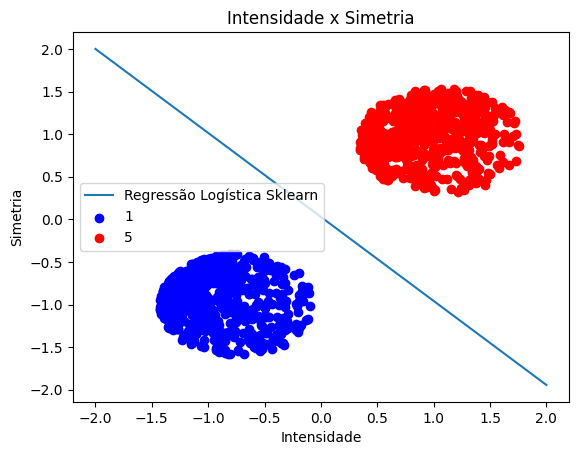

In [23]:
from scipy.special import expit

learning_rate = 0.000001
iterations = 1000
params, costs, accuracies = gradient_descent(X.T, Y, learning_rate, iterations)

x = np.linspace(-2, 2, 100)
y_plot = (-params[0] - params[1]*x) / params[2]
plt.plot(x, y_plot, label='Regressão Logística Sklearn')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Intensidade x Simetria')
plt.legend()

# printe as bolinhas vermelhas e azuis, se a classe for 1, plota vermelho, se for 0, plota azul
plt.scatter(X[Y == 0, 1], X[Y == 0, 2], color='blue', marker='o', label='1')
plt.scatter(X[Y == 1, 1], X[Y == 1, 2], color='red', marker='o', label='5')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Intensidade x Simetria')
plt.legend()
plt.show()